In [2]:
%%file dummy_images_function.py
import numpy as np
import random
def create_dummy_images(Length_Image, High_Image,Ray_circle, object_presence):
    """  
      create an image with pixel values randomly distributed.
      
      If the value of "object_presence" is 1, it is use the function "make_the_object" to create a with circle
      a with cyrcle inside.
      
    """
    # Create an image with random noise
    Image = np.random.uniform(0.5, 1, size=(Length_Image, High_Image))
    New_image=Image
    #Generate a random number to make the size of the object vary
    random_number = random.uniform(0.6, 1)
    Ray_circle=Ray_circle*random_number
    if object_presence==1:
        X_coordinate = np.random.randint(Ray_circle,Length_Image-Ray_circle ) 
        Y_coordinate = np.random.randint(Ray_circle,Length_Image-Ray_circle )
        Image_with_object=make_the_object(X_coordinate, Y_coordinate, Image, Ray_circle)
        New_image=Image_with_object        
    return New_image


def make_the_object(X_coordinate, Y_coordinate, Image, ray_circle):
    """ This function create a with circle in a image, the dimensione and the position of the circle is
       define by the input parameter 
       parameter: 
           Image: the initial image
           X_coordinat,y_coordinate: position of the object
           ray_circle: ray of the object"""
    New_image = Image
    (X_image, Y_image)= Image.shape
    for i in range(X_image):
        for j in range( Y_image):
            if np.square(i-X_coordinate)+np.square(j-Y_coordinate)<np.square(ray_circle):
                #each pixel of the object area will become white with a certain probability
                probability = random.uniform(0, 1)
                if probability>0.30:
                   New_image[i,j]=1
    return New_image

Overwriting dummy_images_function.py


In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import random
from dummy_images_function import make_the_object
from dummy_images_function import create_dummy_images



images = []
objects = []
#define the dimensione of the dataset and generation of the image with the object and the label
Dim_dataset=10
for i in range(Dim_dataset):
    if i<Dim_dataset/2:      
        images.append(create_dummy_images(1024,1024, 50,1))
        objects.append(1)
    else:
        images.append(create_dummy_images(1024,1024, 50,0))
        objects.append(0)
        print("suka")
#costruction of the dataset with the image and the labels
data_set=list(zip(images,objects))


# define the propotrion between training and test set
Dim_training=int(Dim_dataset*0.7)
Dim_test=int(Dim_dataset*0.15)
Dim_validation=int(Dim_dataset*0.15)
images = np.array(images)  
objects = np.array(objects)
indices = np.random.permutation(len(images))

# reorder the dataset randomly
shuffle_images = images[indices]
shuffle_objects = objects[indices]
N = len(images)
split_idx_1 = N * 7 // 10                     
split_idx_2 = split_idx_1 + N * 15 // 100     

# Create the final dataset 
data = {
    "train_data": shuffle_images[:split_idx_1],           
    "train_labels": shuffle_objects[:split_idx_1],
    "validation_data": shuffle_images[split_idx_1:split_idx_2],  
    "validation_labels": shuffle_objects[split_idx_1:split_idx_2],  
    "test_data": shuffle_images[split_idx_2:],           
    "test_labels": shuffle_objects[split_idx_2:]         
}

#save the dataset in a file
#torch.save(data, "dataset_object_size(24,40)_noisy.pth")


suka
suka
suka
suka
suka


In [ ]:
%%file custom_model.py
import torch
import torch.nn as nn
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
class CustomResNet(nn.Module):
    def __init__(self, n_classes,dropout_percentage):
        super(CustomResNet, self).__init__()
        
        self.dropout_percentage = dropout_percentage
        self.relu = nn.ReLU()
        
        # BLOCK-1 (starting block)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=(7,7), stride=(2,2), padding=(3,3))
        self.batchnorm1 = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(kernel_size=(3,3), stride=(2,2), padding=(1,1))
        # BLOCK-2 (1) 
        self.conv2_1_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm2_1_1 = nn.BatchNorm2d(64)  
        self.conv2_1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm2_1_2 = nn.BatchNorm2d(64)
        self.dropout2_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-2 (2)
        self.conv2_2_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm2_2_1 = nn.BatchNorm2d(64)
        self.conv2_2_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm2_2_2 = nn.BatchNorm2d(64)
        self.dropout2_2 = nn.Dropout(p=self.dropout_percentage)
        
        # BLOCK-3 (1) 
        self.conv3_1_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), stride=(2,2), padding=(1,1))
        self.batchnorm3_1_1 = nn.BatchNorm2d(128)
        self.conv3_1_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm3_1_2 = nn.BatchNorm2d(128)
        self.concat_adjust_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1,1), stride=(2,2), padding=(0,0))
        self.dropout3_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-3 (2)
        self.conv3_2_1 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm3_2_1 = nn.BatchNorm2d(128)
        self.conv3_2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm3_2_2 = nn.BatchNorm2d(128)
        self.dropout3_2 = nn.Dropout(p=self.dropout_percentage)
        
        # BLOCK-4 (1) 
        self.conv4_1_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), stride=(2,2), padding=(1,1))
        self.batchnorm4_1_1 = nn.BatchNorm2d(256)
        self.conv4_1_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm4_1_2 = nn.BatchNorm2d(256)
        self.concat_adjust_4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(1,1), stride=(2,2), padding=(0,0))
        self.dropout4_1 = nn.Dropout(p=self.dropout_percentage)                                                 
        # BLOCK-4 (2)
        self.conv4_2_1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm4_2_1 = nn.BatchNorm2d(256)
        self.conv4_2_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm4_2_2 = nn.BatchNorm2d(256)
        self.dropout4_2 = nn.Dropout(p=self.dropout_percentage)
        
        # BLOCK-5 (1)
        self.conv5_1_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3,3), stride=(2,2), padding=(1,1))
        self.batchnorm5_1_1 = nn.BatchNorm2d(512)
        self.conv5_1_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm5_1_2 = nn.BatchNorm2d(512)
        self.concat_adjust_5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(1,1), stride=(2,2), padding=(0,0))
        self.dropout5_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-5 (2)
        self.conv5_2_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm5_2_1 = nn.BatchNorm2d(512)
        self.conv5_2_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm5_2_2 = nn.BatchNorm2d(512)
        self.dropout5_2 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-6 (1) 
        self.conv6_1_1 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=(3,3), stride=(2,2), padding=(1,1))
        self.batchnorm6_1_1 = nn.BatchNorm2d(1024)
        self.conv6_1_2 = nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm6_1_2 = nn.BatchNorm2d(1024)
        self.concat_adjust_6 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=(1,1), stride=(2,2), padding=(0,0))
        self.dropout6_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-6 (2)
        self.conv6_2_1 = nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm6_2_1 = nn.BatchNorm2d(1024)
        self.conv6_2_2 = nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm6_2_2 = nn.BatchNorm2d(1024)
        self.dropout6_2 = nn.Dropout(p=self.dropout_percentage)

         # BLOCK-7 (1) 
        self.conv7_1_1 = nn.Conv2d(in_channels=1024, out_channels=2048, kernel_size=(3,3), stride=(2,2), padding=(1,1))
        self.batchnorm7_1_1 = nn.BatchNorm2d(2048)
        self.conv7_1_2 = nn.Conv2d(in_channels=2048, out_channels=2048, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm7_1_2 = nn.BatchNorm2d(2048)
        self.concat_adjust_7 = nn.Conv2d(in_channels=1024, out_channels=2048, kernel_size=(1,1), stride=(2,2), padding=(0,0))
        self.dropout7_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-7 (2)
        self.conv7_2_1 = nn.Conv2d(in_channels=2048, out_channels=2048, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm7_2_1 = nn.BatchNorm2d(2048)
        self.conv7_2_2 = nn.Conv2d(in_channels=2048, out_channels=2048, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.batchnorm7_2_2 = nn.BatchNorm2d(2048)
        self.dropout7_2 = nn.Dropout(p=self.dropout_percentage)
        
        # Final Block input=(7x7) 
        self.avgpool = nn.AvgPool2d(kernel_size=(8,8), stride=(1,1))
        self.fc = nn.Linear(in_features=1*1*2048, out_features=1000, bias=True)
        self.out_1 = nn.Linear(in_features=1000, out_features=100,bias=True)
        self.out_2=nn.Linear(in_features=100, out_features=n_classes, bias=True) 
   
        
    def forward(self, x):
        
        # block 1 --> Starting block
        x = self.relu(self.batchnorm1(self.conv1(x))) #512x512 64
        op1 = self.maxpool1(x)  #512x512 64
        
        # block2 - 1
        x = self.relu(self.batchnorm2_1_1(self.conv2_1_1(op1)))    # conv2_1   
        x = self.batchnorm2_1_2(self.conv2_1_2(x))                 # conv2_1
        x = self.dropout2_1(x)
        # block2 - Adjust - No adjust in this layer as dimensions are already same
        # block2 - Concatenate 1
        op2_1 = self.relu(x + op1)
        
        # block2 - 2
        x = self.relu(self.batchnorm2_2_1(self.conv2_2_1(op2_1)))  # conv2_2 
        x = self.batchnorm2_2_2(self.conv2_2_2(x))                 # conv2_2
        x = self.dropout2_2(x)
        # op - block2
        op2 = self.relu(x + op2_1)
        

        # block3 - 1[Convolution block]
        x = self.relu(self.batchnorm3_1_1(self.conv3_1_1(op2)))    # conv3_1
        x = self.batchnorm3_1_2(self.conv3_1_2(x))                 # conv3_1
        x = self.dropout3_1(x)
        # block3 - Adjust
        op2 = self.concat_adjust_3(op2) # SKIP CONNECTION
        # block3 - Concatenate 1
        op3_1 = self.relu(x + op2)
        # block3 - 2[Identity Block]
        x = self.relu(self.batchnorm3_2_1(self.conv3_2_1(op3_1)))  # conv3_2
        x = self.batchnorm3_2_2(self.conv3_2_2(x))                 # conv3_2 
        x = self.dropout3_2(x)
        # op - block3
        op3 = self.relu(x + op3_1)
                

        # block4 - 1[Convolition block]
        x = self.relu(self.batchnorm4_1_1(self.conv4_1_1(op3)))    # conv4_1
        x = self.batchnorm4_1_2(self.conv4_1_2(x))                 # conv4_1
        x = self.dropout4_1(x)
        # block4 - Adjust
        op3 = self.concat_adjust_4(op3) # SKIP CONNECTION
        # block4 - Concatenate 1
        op4_1 = self.relu(x + op3)
        # block4 - 2[Identity Block]
        x = self.relu(self.batchnorm4_2_1(self.conv4_2_1(op4_1)))  # conv4_2
        x = self.batchnorm4_2_2(self.conv4_2_2(x))                 # conv4_2
        x = self.dropout4_2(x)
        # op - block4
        op4 = self.relu(x + op4_1)
       
        
        # block5 - 1[Convolution Block]
        x = self.relu(self.batchnorm5_1_1(self.conv5_1_1(op4)))    # conv5_1
        x = self.batchnorm5_1_2(self.conv5_1_2(x))                 # conv5_1
        x = self.dropout5_1(x)
        # block5 - Adjust
        op4 = self.concat_adjust_5(op4) # SKIP CONNECTION
        # block5 - Concatenate 1
        op5_1 = self.relu(x + op4)
        # block5 - 2[Identity Block]
        x = self.relu(self.batchnorm5_2_1(self.conv5_2_1(op5_1)))  # conv5_2
        x = self.batchnorm5_2_1(self.conv5_2_1(x))                 # conv5_2
        x = self.dropout5_2(x)
        # op - block5
        op5 = self.relu(x + op5_1)
       

        #Block 6
        x = self.relu(self.batchnorm6_1_1(self.conv6_1_1(op5)))    # conv5_1
        x = self.batchnorm6_1_2(self.conv6_1_2(x))                 # conv5_1
        x = self.dropout6_1(x)
        # block6 - Adjust
        op5 = self.concat_adjust_6(op5) # SKIP CONNECTION
        # block6 - Concatenate 1
        op6_1 = self.relu(x + op5)
        # block6 - 2[Identity Block]
        x = self.relu(self.batchnorm6_2_1(self.conv6_2_1(op6_1)))  # conv5_2
        x = self.batchnorm6_2_1(self.conv6_2_1(x))                 # conv5_2
        x = self.dropout6_2(x)
        # op - block6
        op6 = self.relu(x + op6_1)
       

        #Block 7
        x = self.relu(self.batchnorm7_1_1(self.conv7_1_1(op6)))    # conv5_1
        x = self.batchnorm7_1_2(self.conv7_1_2(x))                 # conv5_1
        x = self.dropout7_1(x)
        # block6 - Adjust
        op6 = self.concat_adjust_7(op6) # SKIP CONNECTION
        # block6 - Concatenate 1
        op7_1 = self.relu(x + op6)
        # block6 - 2[Identity Block]
        x = self.relu(self.batchnorm7_2_1(self.conv7_2_1(op7_1)))  # conv5_2
        x = self.batchnorm7_2_1(self.conv7_2_1(x))                 # conv5_2
        x = self.dropout7_2(x)
        # op - block6
        op7 = self.relu(x + op7_1)
        


        
       
        x = self.avgpool(op7)
       
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.fc(x))
        x = self.relu(self.out_1(x))
        x = self.out_2(x)

        return x





In [1]:
import random
import wandb
import os
import logging
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
from custom_model import CustomResNet
#laod the dataset of the image
dataset = torch.load("dataset_object_size(24,40)_noisy.pth")

train_data = dataset["train_data"]
train_labels = dataset["train_labels"]
test_data = dataset["test_data"]
test_labels = dataset["test_labels"]
validation_data=dataset["validation_data"]
validation_labels=dataset["validation_labels"]

#convert the data in to tensor
train_data = torch.tensor(train_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_data = torch.tensor(test_data, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)
validation_data=torch.tensor(validation_data, dtype=torch.float32)
validation_labels=torch.tensor(validation_labels, dtype=torch.float32)

#Define the custom Dataset
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform 

    def __len__(self):
        return len(self.data)  

    def __getitem__(self, idx):
        img = self.data[idx]
        label = self.labels[idx]

       
        if self.transform:
            img = self.transform(img)

        return img, label
        
#no trasformation applyed        
transform = None  


# Adding dimension for grayscale 
train_data = train_data.unsqueeze(1)  # Da [120, 1024, 1024] → [120, 1, 1024, 1024]
test_data = test_data.unsqueeze(1)  # Da [30, 1024, 1024] → [30, 1, 1024, 1024]
validation_data = validation_data.unsqueeze(1)

# Create Dataset instances for training and testing
train_dataset = CustomDataset(train_data, train_labels, transform=transform)
test_dataset = CustomDataset(test_data, test_labels, transform=transform)
validation_dataset = CustomDataset(validation_data, validation_labels, transform=transform)

batch_size = 5
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
validationloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
#Initialize the custom model
#Number of neurons turned off after each execution
dropout_percentage=0.5
model = CustomResNet(n_classes=2,dropout_percentage=dropout_percentage)
#reset_weights(model)
# Define loss function 
criterion = nn.CrossEntropyLoss()


# Start a new wandb run to track this script.
run = wandb.init(
    # Set the wandb entity where your project will be logged (generally your team name).
    entity="giovanni-gueltrini-universit-di-bologna",
    # Set the wandb project where this run will be logged.
    project="Development of neural networks for image analysis",
    # Track hyperparameters and run metadata.
    config={
        "architecture": "CustomResNet",
        "dataset": "dataset_object_size(24,40)_noisy.pth",
        "dropout_percentage":dropout_percentage,
        "epochs":20
    },
)
#start of the training of the model
for epoch in range(20):
    model.train()

    #initialize the running_loss for this epoch
    running_loss = 0
    
    #decrease learning rate epoch by epoch 
    lr = 0.05 / ((epoch+1))
    
    #Initialize Adam optimizer with the current learning rate
    optimizer = torch.optim.Adam(model.parameters(), lr)   

    
    for images, labels in trainloader:
         # Clear the gradients before the backpropagation to avoid gradient accumulation
        optimizer.zero_grad()
        images = images.float()
        # Pass the images through the model to get predictions
        outputs = model(images)
        #calculate loss, perform the backpropagation and update weight
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f"Loss istantanea per epoca {epoch+1}: {loss.item()}")
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")
    # Logga la loss per ogni epoca
    wandb.log({"epoch": epoch+1, "loss": running_loss/len(trainloader),"learning rate":lr})
   
    #We now calculate the accuracy using th test data
    correct = 0
    total = 0 
    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
       
    accuracy = 100 * correct / total
    print(f"Accuratezza per epoca {epoch+1}: {accuracy:.2f}%")
    # load info in wandb
    wandb.log({"epoch": epoch, "accuracy": accuracy,"learning rate":lr})
# Evaluate on validation set
correct_val = 0
total_val = 0
with torch.no_grad():
    for images, labels in validationloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()
validation_accuracy = 100 * correct_val / total_val
print(f"validation_accuracy: {validation_accuracy:.2f}%")
wandb.log({"validation test accurancy":validation_accuracy })
torch.save(model.state_dict(), "model_weights_object_size(24,40)_drop=0.5_noisy.pth")
wandb.finish()

Using device: cpu


C:\Users\Giovanni Gueltrini\AppData\Local\Temp\ipykernel_13120\2887901191.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("dataset_object_size(24,4

Loss istantanea per epoca 1: 0.7092863321304321
Loss istantanea per epoca 1: 242638.84375
Loss istantanea per epoca 1: 127.576171875
Loss istantanea per epoca 1: 489.9564514160156
Loss istantanea per epoca 1: 36.94749450683594
Loss istantanea per epoca 1: 40.82416534423828
Loss istantanea per epoca 1: 1.8945707082748413
Loss istantanea per epoca 1: 1.0515005588531494
Loss istantanea per epoca 1: 6.4225335121154785
Loss istantanea per epoca 1: 21.51786231994629
Loss istantanea per epoca 1: 90.67459869384766
Loss istantanea per epoca 1: 1.2681347131729126
Loss istantanea per epoca 1: 0.9176629185676575
Loss istantanea per epoca 1: 0.4892140030860901
Epoch 1, Loss: 17389.935242635864
Accuratezza per epoca 1: 60.00%
Loss istantanea per epoca 2: 0.4593775272369385
Loss istantanea per epoca 2: 6.610890865325928
Loss istantanea per epoca 2: 0.5136669874191284
Loss istantanea per epoca 2: 6.9687652587890625
Loss istantanea per epoca 2: 1.0558794736862183
Loss istantanea per epoca 2: 0.00220324

accuracy,▁▁▁███▂▇█▇████▇▇▇▇██
epoch,▁▁▂▁▂▂▂▂▃▂▃▃▃▃▄▃▄▄▅▄▅▅▅▅▆▅▆▆▆▆▇▆▇▇▇▇█▇██
learning rate,██▄▄▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation test accurancy,▁
accuracy,100
epoch,19
learning rate,0.0025
loss,0
validation test accurancy,93.33333


Using device: cpu


C:\Users\Giovanni Gueltrini\AppData\Local\Temp\ipykernel_28328\4141565725.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model_weight

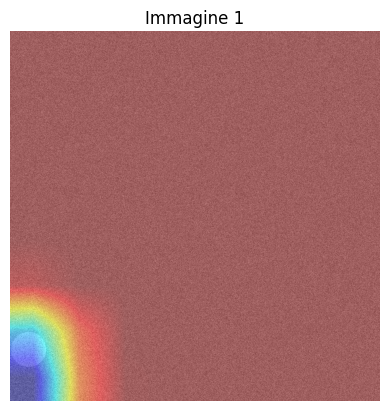

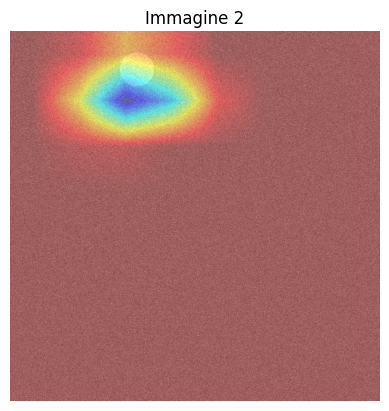

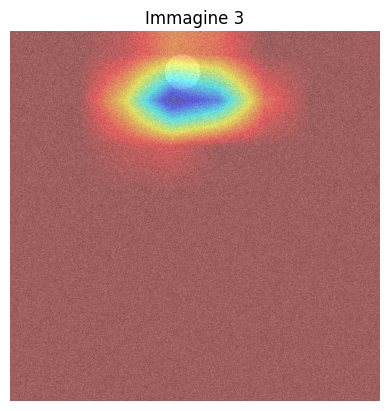

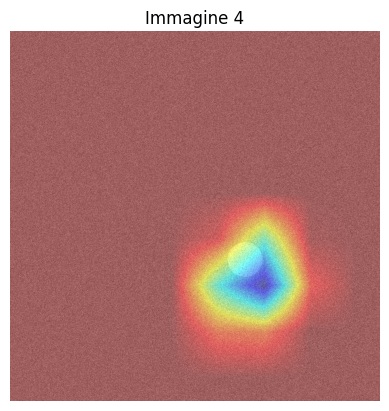

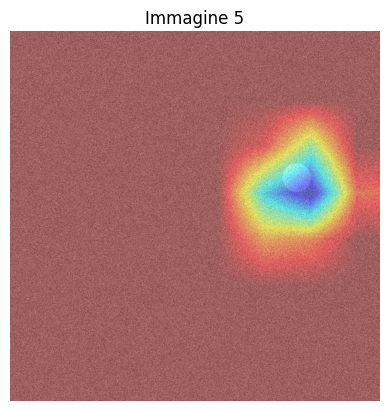

In [1]:
import torch
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import numpy as np
import matplotlib.pyplot as plt
from custom_model import CustomResNet  # Il tuo modello
import random
from dummy_images_function import make_the_object
from dummy_images_function import create_dummy_images
from pytorch_grad_cam import GradCAMPlusPlus

# Carica il modello
model = CustomResNet(n_classes=2, dropout_percentage=0)
model.load_state_dict(torch.load("model_weights_object_size(24,40)_drop=0.3_noisy.pth"))
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Layer target da visualizzare
target_layers = [model.conv7_2_1]  # Sostituiscilo con il layer corretto

# Inizializza GradCAM
cam = GradCAM(model=model, target_layers=target_layers)

# Categoria target
target_category = 1  
target = ClassifierOutputTarget(target_category)

# Numero di immagini da elaborare
n_images = 5

for i in range(n_images):
    # Crea immagine fittizia
    image = create_dummy_images(1024, 1024, 50, 1)  # restituisce un array 2D (H x W)
    
    # Preprocessing
    input_image_1 = torch.from_numpy(image)
    input_image = input_image_1.unsqueeze(0).unsqueeze(0)  # [1, 1, H, W]
    input_tensor = input_image.to(device).float()

    # Forward + GradCAM
    output = model(input_tensor)
    model.zero_grad()
    output[:, target_category].backward(retain_graph=True)
    result = cam(input_tensor=input_tensor, targets=[target])

    # Prepara immagine per visualizzazione
    image_3d = np.repeat(np.expand_dims(image, axis=-1), 3, axis=-1)
    cam_image = show_cam_on_image(image_3d.astype(np.float32), result[0], use_rgb=False)

    # Visualizza
    plt.figure()
    plt.imshow(cam_image)
    plt.title(f"Immagine {i+1}")
    plt.axis('off')
    plt.show()



In [3]:
%%file test.py
import torch
from hypothesis import given, settings
import hypothesis.strategies as st
import pytest
import numpy as np
from custom_model import CustomResNet
from dummy_images_function import make_the_object
from dummy_images_function import create_dummy_images

def test_output_shape():
    #define the model 
    model = CustomResNet(n_classes=2, dropout_percentage=0.2)
    #create a image for testing
    dummy_input = torch.randn(4, 1, 1024, 1024)
    #apply the model to the image 
    output = model(dummy_input)
    #controll if the shape of the output is correct 
    assert output.shape == (4, 2)
   

def test_backward_pass():
    # Define the model
    model = CustomResNet(n_classes=2, dropout_percentage=0.1)    
    # Create a dummy input with gradient tracking enabled
    dummy_input = torch.randn(2, 1, 1024, 1024, requires_grad=True)
    # Apply the model to the dummy input
    output = model(dummy_input)
    # Calculate the loss by summing the output
    loss = output.sum()
    # Perform backpropagation to compute the gradients
    loss.backward()
    # Check if the gradients for the  input are computed
    assert dummy_input.grad is not None



@given(Length_Image=st.integers(min_value=250, max_value=1024),
       High_Image=st.integers(min_value=250, max_value=1024),
       Ray_circle=st.integers(min_value=10, max_value=50),
       object_presence=st.integers(0, 1))
@settings(deadline=8000) 

def test_dimension_dummy_images(Length_Image, High_Image,Ray_circle, object_presence):
    """ I check that the output of the function is indeed an array of the desired size (Length_image, High_image)"""
    image=create_dummy_images(Length_Image, High_Image,Ray_circle, object_presence)
    assert image.shape==(Length_Image, High_Image)

@given(
    Length_Image=st.integers(min_value=250,max_value=250),
    High_Image=st.integers(min_value=250,max_value=250),
    Ray_circle=st.integers(min_value=10,max_value=10))

@settings(max_examples=1, deadline=None)
   

def test_reorder(Length_Image, High_Image,Ray_circle):
    """check whether the dataset has been correctly reordered """
    images = []
    objects = []
    #define the dimensione of the dataset and generation of the image with the object and the label
    Dim_dataset=50
    for i in range(Dim_dataset):
        if i<Dim_dataset/2:      
            images.append(create_dummy_images(Length_Image,High_Image, Ray_circle,1))
            objects.append(1)
        else:
            images.append(create_dummy_images(Length_Image, High_Image,Ray_circle,0))
            objects.append(0)
    #costruction of the dataset with the image and the labels
    data_set=list(zip(images,objects))
    
    
    # define the propotrion between training and test set
    Dim_training=int(Dim_dataset*0.7)
    Dim_test=int(Dim_dataset*0.15)
    Dim_validation=int(Dim_dataset*0.15)
    images = np.array(images)  
    objects = np.array(objects)
    indices = np.random.permutation(len(images))
    
    # reorder the dataset randomly
    shuffle_images = images[indices]
    shuffle_objects = objects[indices]
    N = len(images)
    split_idx_1 = N * 7 // 10                     
    split_idx_2 = split_idx_1 + N * 15 // 100     
    

    # create the final dataset 
    data = {
    "train_data": shuffle_images[:split_idx_1],           
    "train_labels": shuffle_objects[:split_idx_1],
    "validation_data": shuffle_images[split_idx_1:split_idx_2],  
    "validation_labels": shuffle_objects[split_idx_1:split_idx_2],  
    "test_data": shuffle_images[split_idx_2:],           
    "test_labels": shuffle_objects[split_idx_2:]          
    }

    # Verify that both labels in the training contain 0 and 1
    unique_train_labels = np.unique(data["train_labels"])
    assert 0 in unique_train_labels and 1 in unique_train_labels, \
    
    # Verify that both labels in the test contain 0 and 1
    unique_test_labels = np.unique(data["test_labels"])
    assert 0 in unique_test_labels and 1 in unique_test_labels, \
        f"Test labels do not contain both 0 and 1. Found: {unique_test_labels}"

    # Verify that both labels in the validation contain 0 and 1
    unique_validation_labels = np.unique(data["validation_labels"])
    assert 0 in unique_validation_labels and 1 in unique_validation_labels, \
        f"Test labels do not contain both 0 and 1. Found: {unique_validation_labels}"


Overwriting test.py


In [1]:
%%file segmentation_tool.py
import random
import numpy as np
def create_dummy_images_with_binary(Length_Image, High_Image,Ray_circle, object_presence):
    """  
      Generate two images: one with random pixel values and one that is entirely black.      
       
      If the value of "object_presence" is 1, it is use the function "make_the_object" to create a with circle
      a with cyrcle inside.

    
    """
    # Create an image with random noise
    Image = np.random.uniform(0.5, 1, size=(Length_Image, High_Image))
    Clean_Image = np.zeros((Length_Image, High_Image))

    New_image=Image
    #Generate a random number to make the size of the object vary
    random_number = random.uniform(0.6, 1)
    Ray_circle=Ray_circle*random_number
    X_coordinate = np.random.randint(Ray_circle,Length_Image-Ray_circle ) 
    Y_coordinate = np.random.randint(Ray_circle,Length_Image-Ray_circle )
    Image_with_object=make_the_object_binary(X_coordinate, Y_coordinate, Image, Ray_circle,1)
    Clean_Image_with_object=make_the_object_binary(X_coordinate, Y_coordinate, Clean_Image, Ray_circle,0)
    New_image=Image_with_object        
    return New_image, Clean_Image_with_object


def make_the_object_binary(X_coordinate, Y_coordinate, Image, ray_circle,noise):
    """ This function create a with circle in a image, the dimensione and the position of the circle is
       define by the input parameter 
       parameter: 
           Image: the initial image
           X_coordinat,y_coordinate: position of the object
           ray_circle: ray of the object
           noise: if noise is 1, the circle will be noisy,
                  if noise is 0, the circle will be noisy enterily witj  """
    New_image = Image
    (X_image, Y_image)= Image.shape
    if noise==0:
        for i in range(X_image):
            for j in range( Y_image):
                if np.square(i-X_coordinate)+np.square(j-Y_coordinate)<np.square(ray_circle):
                    New_image[i,j]=1
    else:
        for i in range(X_image):
            for j in range( Y_image):
                if np.square(i-X_coordinate)+np.square(j-Y_coordinate)<np.square(ray_circle):
                    #each pixel of the object area will become white with a certain probability
                    probability = random.uniform(0, 1)
                    if probability>0.30:
                       New_image[i,j]=1            
    return New_image
def Dice_Sorensen(ImageT,ImageF):  
    intersection= np.sum(np.multiply(ImageT, ImageF))
    union=np.sum(ImageT)+np.sum(ImageF)
    return((2*intersection)/union)

Overwriting segmentation_tool.py


C:\Users\Giovanni Gueltrini\AppData\Local\Temp\ipykernel_3656\3210147925.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model_weights

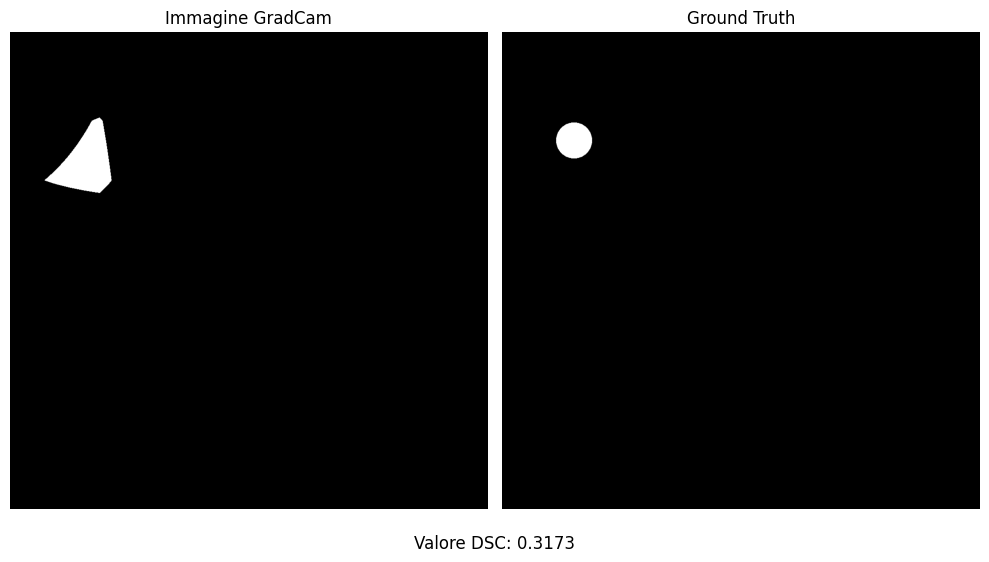

In [9]:
import torch
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import numpy as np
import random
from torchvision import transforms
from custom_model import CustomResNet
from segmentation_tool import Dice_Sorensen, make_the_object_binary, create_dummy_images_with_binary
import matplotlib.pyplot as plt

# load the model and the weights
model = CustomResNet(n_classes=2,dropout_percentage=0)
model.load_state_dict(torch.load("model_weights_object_size(24,40)_drop=0.3_noisy.pth"))
model.eval()
#select the target layer to be evaluated
target_layers = [model.conv7_2_1]  

# create a test image
image, ground_truth = create_dummy_images_with_binary(1024, 1024, 50, 1)  
input_image_1 = torch.from_numpy(image)
input_image = input_image_1.unsqueeze(0).unsqueeze(0)  
input_tensor = input_image.to(torch.device("cuda" if torch.cuda.is_available() else "cpu")).float()

# Initialize Grad-CAM function 
cam = GradCAM(model=model, target_layers=target_layers)

# select the label 
target_category = 1  
#Create a target for the class 
target = ClassifierOutputTarget(target_category)

# apply the model
output = model(input_tensor)

# Perform back-propagation
model.zero_grad()  
output[:, target_category].backward(retain_graph=True) 

#apply Grad cam
result = cam(input_tensor=input_tensor, targets=[target])
image_3d = np.repeat(np.expand_dims(image, axis=-1), 3, axis=-1) 

# Visualize the result
cam_image = show_cam_on_image(np.array(image_3d) , result[0], use_rgb=False) 
interest_cam_image=result[0]
#normalize pixel values 
norm_interest_cam_image= (interest_cam_image - np.min(interest_cam_image)) / (np.max(interest_cam_image) - np.min(interest_cam_image))
#define and apply the threshold
threshold = 0.8
matrice_binaria = np.where(norm_interest_cam_image>= threshold, 1,0)

#compute the DSC between ground truth and the heat map 
DSC=Dice_Sorensen(ground_truth, matrice_binaria)

fig, axes = plt.subplots(1, 2, figsize=(10, 7))
#Heat map
axes[0].imshow(matrice_binaria, cmap='gray')
axes[0].set_title('Immagine GradCam')
axes[0].axis('off')

#Ground Truth
axes[1].imshow(ground_truth, cmap='gray')
axes[1].set_title('Ground Truth')
axes[1].axis('off')
fig.suptitle(f"Valore DSC: {DSC:.4f}", fontsize=12, y=0.1)
plt.subplots_adjust(top=1, bottom=0.4)
#save image
plt.tight_layout()
plt.savefig("segmentation/confronto_gradcam_groundtruth_4.png", dpi=100)  
plt.show()
